In [1]:
#import the libraries
import pandas as pd
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# get the dataset and shuffle it and split the dataset between train and test
boston_housing = keras.datasets.boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
order = np.argsort(np.random.random(y_train.shape))
X_train = X_train[order]
y_train = y_train[order]
print(X_train[0])

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [3]:
#load the dataset as pandas dataframe and print it
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features_df = pd.DataFrame(X_train, columns=column_names)
features_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [4]:
#Normalize the data since data as the data ranges varies
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [5]:
#build model using sequential model. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(50,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(50,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
model.fit(X_train, y_train, epochs=50)
val_loss= model.evaluate(X_test,y_test)

Epoch 1/50
404/404 [==============================] - 1s 1ms/step - loss: 563.4002
Epoch 2/50
404/404 [==============================] - 0s 77us/step - loss: 475.7173
Epoch 3/50
404/404 [==============================] - 0s 77us/step - loss: 326.3159
Epoch 4/50
404/404 [==============================] - 0s 116us/step - loss: 143.0382
Epoch 5/50
404/404 [==============================] - 0s 77us/step - loss: 72.0613
Epoch 6/50
404/404 [==============================] - 0s 116us/step - loss: 48.8135
Epoch 7/50
404/404 [==============================] - 0s 77us/step - loss: 35.0079
Epoch 8/50
404/404 [==============================] - 0s 77us/step - loss: 28.3801
Epoch 9/50
404/404 [==============================] - 0s 116us/step - loss: 24.9347
Epoch 10/50
404/404 [==============================] - 0s 77us/step - loss: 22.3995
Epoch 11/50
404/404 [==============================] - 0s 77us/step - loss: 20.3448
Epoch 12/50
404/404 [==============================] - 0s 116us/step - loss: 18

In [7]:
print(val_loss)

20.150401395909928


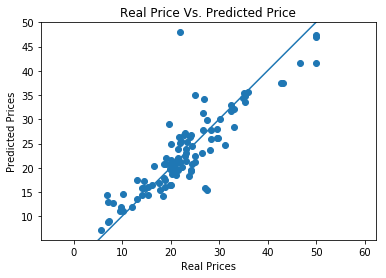

In [8]:
#create scatter plot of true values vs predicted values
pred_y = model.predict(X_test).flatten()
plt.scatter(y_test, pred_y)
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Real Price Vs. Predicted Price')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim()) 
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

In [13]:
score = r2_score(y_test, pred_y)

In [14]:
print (score)

0.7579352445633595
